# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# read the data
df = pd.read_csv('drive/MyDrive/Python Course/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [5]:
# Write your code here
print(df.shape)

(1898, 9)


#### Observations: There are 1898 rows and 9 columns present in the data


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [6]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
dtypes: float, int, object

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [7]:
# Write your code here
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations: There are no missing values. For rating, I think "not given" is not count as missing values.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [8]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
Time it takes for food to be prepared once an order is placed:
Minimum - 20 min
Average - 27.37197 min
Maximum - 35 min

### **Question 5:** How many orders are not rated?

In [9]:
# Write the code here
df[df['rating'] == 'Not given'].shape[0]

736

#### Observations:
There are 735 orders not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

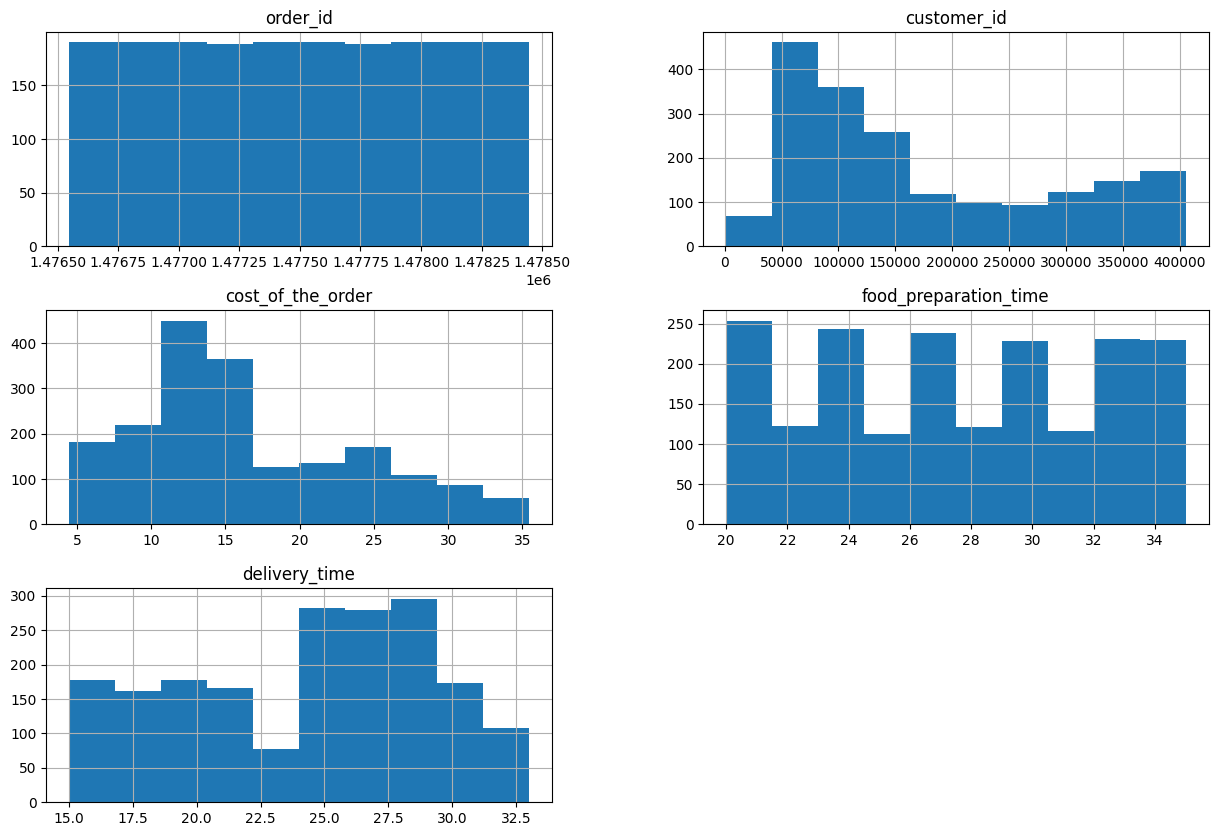

In [10]:
# Write the code here
# Histograms
df.hist(figsize=(15,10))
plt.show()

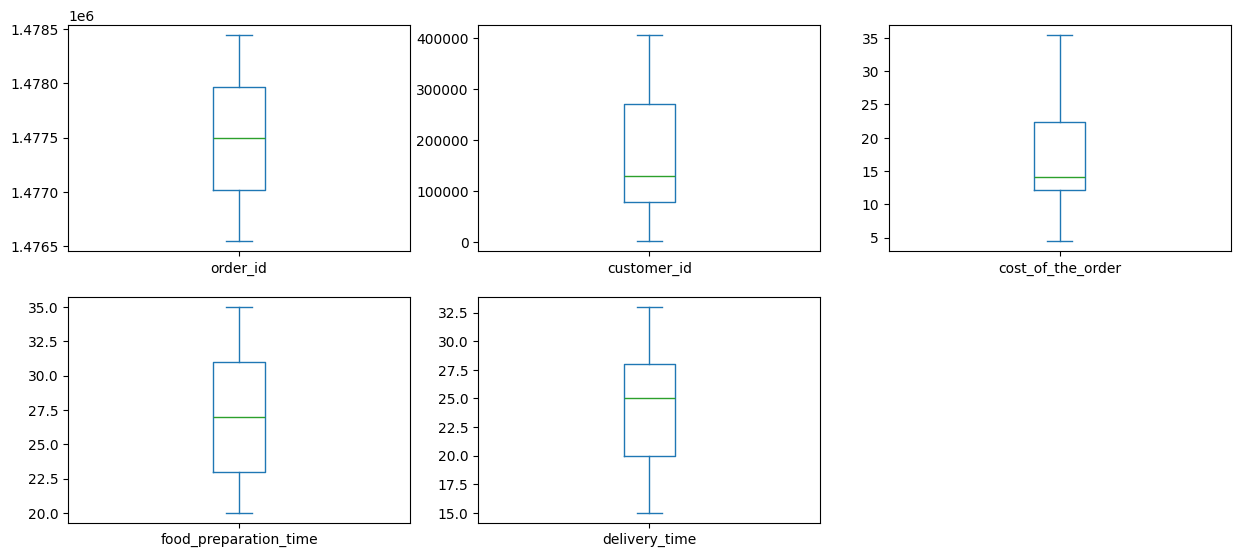

In [11]:
# Boxplots
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,10))
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


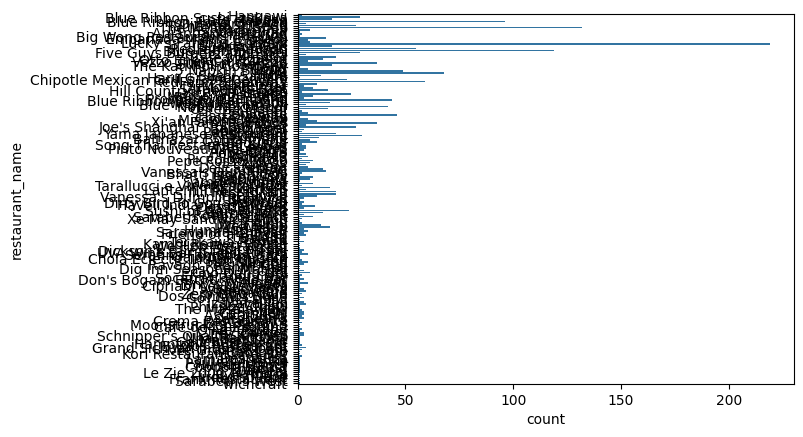

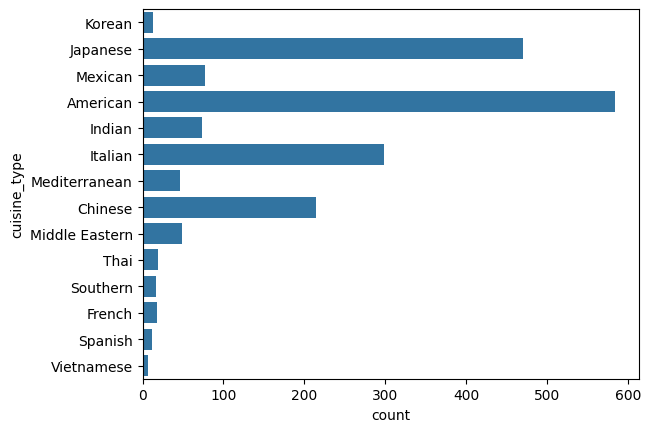

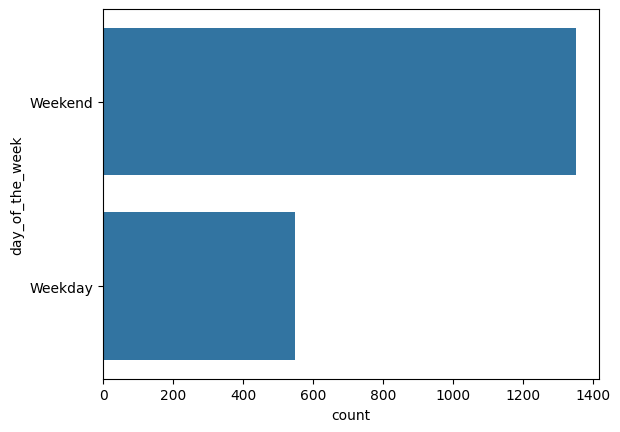

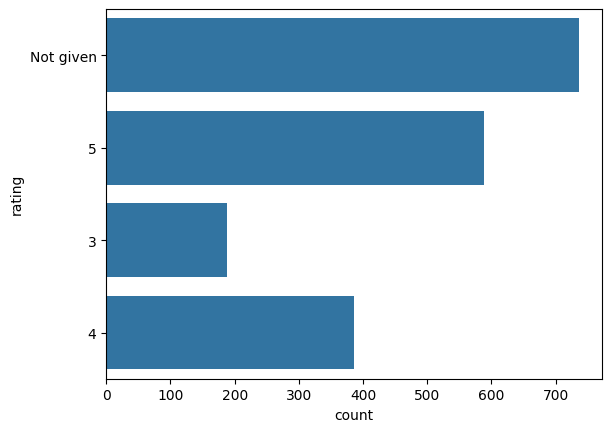

In [12]:
# Countplots
for i in df.select_dtypes(include=['object', 'category']).columns:
  plt.figure()
  sns.countplot(df[i])
  plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [13]:
# Write the code here
df['restaurant_name'].value_counts().head()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
The top 5 restauratns are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm

### **Question 8**: Which is the most popular cuisine on weekends?

In [14]:
# Write the code here
df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().head()

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53


#### Observations:
American cuisine is the most popular suicine in weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [15]:
# Write the code here
total_orders = df.shape[0]
orders_cost_more_than_20 = df[df['cost_of_the_order'] > 20].shape[0]
percentage_orders_cost_more_than_20 = (orders_cost_more_than_20 / total_orders) * 100
print("Percentage of orders cost more than 20 dollars: ", percentage_orders_cost_more_than_20)

Percentage of orders cost more than 20 dollars:  29.24130663856691


#### Observations:
Percentage of orders cost more than 20 dollars is about 29%

### **Question 10**: What is the mean order delivery time?

In [16]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean order delivery time is about 24.162 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [17]:
# Write the code here
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
The IDs of these customers and the number of orders they placed:
52832 （13）
47440（10）
83287（9）

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

In [18]:
# Write the code here
# Correlation analysis (numerical variables)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_columns].corr()
print(correlation_matrix)

                       order_id  customer_id  cost_of_the_order  \
order_id               1.000000    -0.013960           0.021171   
customer_id           -0.013960     1.000000          -0.001322   
cost_of_the_order      0.021171    -0.001322           1.000000   
food_preparation_time -0.007026    -0.030330           0.041527   
delivery_time          0.009690    -0.009885          -0.029949   

                       food_preparation_time  delivery_time  
order_id                           -0.007026       0.009690  
customer_id                        -0.030330      -0.009885  
cost_of_the_order                   0.041527      -0.029949  
food_preparation_time               1.000000       0.011094  
delivery_time                       0.011094       1.000000  


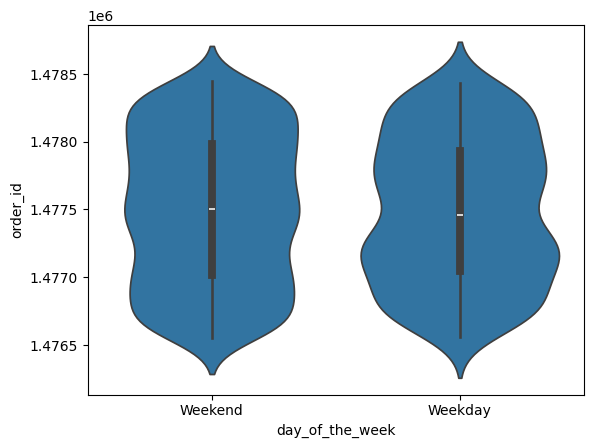

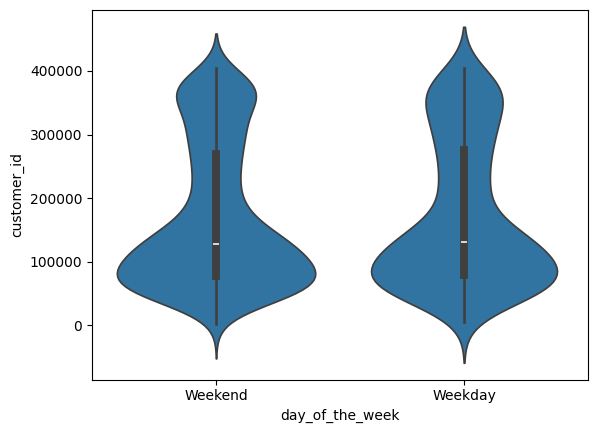

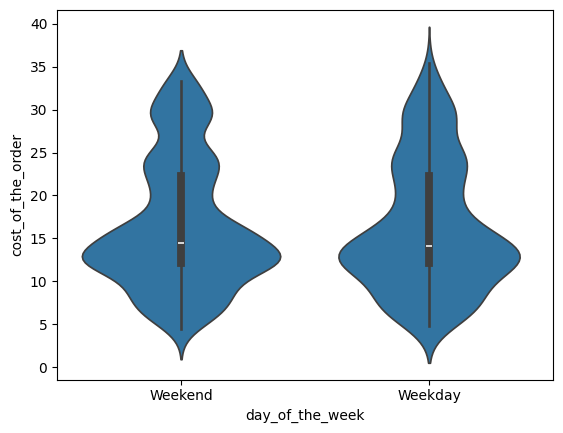

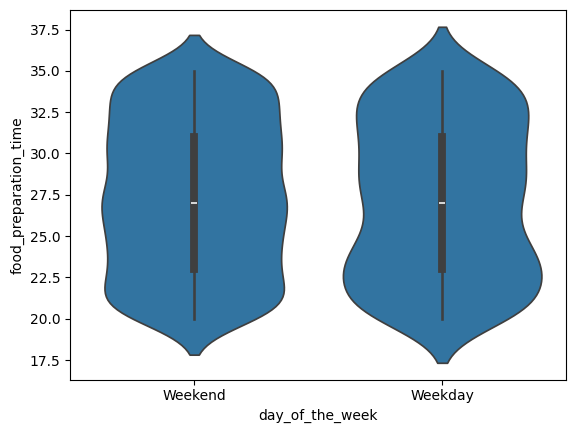

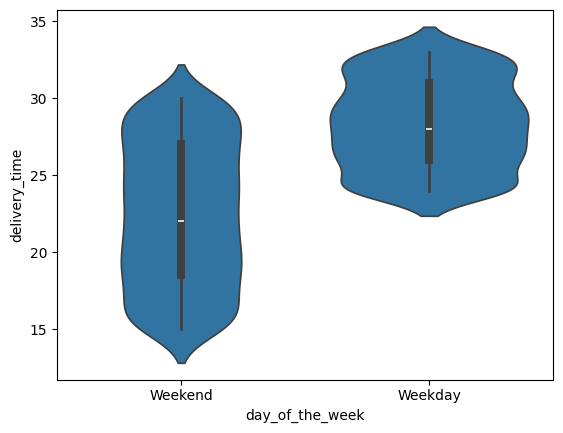

In [19]:
# Relations between numerical and categorical variables
# Violin Plot
for i in df.select_dtypes(include=['int64', 'float64']).columns:
  plt.figure()
  sns.violinplot(x='day_of_the_week', y=i, data=df)
  plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [23]:
# Write the code here
# Convert rating to Numeric, and remove rows with 'not given'
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.dropna(subset=['rating'])

## Group the data by restaurant_name
restaurant_stats = df.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Rename columns for clarity
restaurant_stats.rename(columns={'count': 'rating_count', 'mean': 'average_rating'}, inplace=True)

# Filter restaurants meeting the criteria
promotional_restaurants = restaurant_stats[(restaurant_stats['rating_count'] > 50) &
                                           (restaurant_stats['average_rating'] > 4)]

# Display the results
print("Restaurants fulfilling the criteria:")
print(promotional_restaurants)

Restaurants fulfilling the criteria:
                           rating_count  average_rating
restaurant_name                                        
Blue Ribbon Fried Chicken            64        4.328125
Blue Ribbon Sushi                    73        4.219178
Shake Shack                         133        4.278195
The Meatball Shop                    84        4.511905


<ipython-input-23-0a783c458541>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


#### Observations:
Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack and The Meatball shop are eligible.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [24]:
# Write the code here
# Revenue calculation function
def calculate_revenue(row):
    if row['cost_of_the_order'] > 20:
        return row['cost_of_the_order'] * 0.25
    elif row['cost_of_the_order'] > 5:
        return row['cost_of_the_order'] * 0.15
    else:
        return 0
# Apply it
df['revenue'] = df.apply(calculate_revenue, axis=1)
total_revenue = df['revenue'].sum()
print("Net revenue generated by the company across all orders:", total_revenue)

Net revenue generated by the company across all orders: 3865.572


#### Observations:
Net revenue generated by the company across all orders is 3865.572

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [25]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
percentage_orders_more_than_60_minutes = (df[df['total_time'] > 60].shape[0] / df.shape[0]) * 100
print("Percentage of orders taking more than 60 minutes to get delivered:", percentage_orders_more_than_60_minutes)

Percentage of orders taking more than 60 minutes to get delivered: 10.240963855421686


#### Observations:
Percentage of orders taking more than 60 minutes to get delivered is 10.24%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [26]:
# Write the code here
df.groupby('day_of_the_week')['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.305882
Weekend,22.436740


#### Observations:
Weekdays need more time to delivery.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  American, Janpanses, Italian and Chinese are the most popular cuisine types.
*  Restaurant with consistently high ratings and frequent orders tend to dominate in customer preference
*  The percentage of orders taking more than 60 minutes, which would impact customer satisfaction are about 10%.
*  The delivery time of the orders on weekends is shorter then on weekdays, weekends also have higher counts of orders.
*  Orders costing more than 20$ generate a significant portion of the company's revenue due to the higher margin charged on such orders.
* Many customers tend not to give rates for their orders.

### Recommendations:

*  Collaborating with restaurants to reduce preparation times; streamline order processing workflows; allocate delivery personnel based on historical data; and minimize wait times for pick-ups can enhance delivery efficiency.
*  Encourage customers to rate their orders by implementing gamification strategies such as reward points, discount redemption.
*  Encourage restaurants to offer more high-value items (more then 20 dollors) by providing insights into popular and profitable menu items.
*  Use machine learning models to predict peak order times and dynamically adjust resource allocation for better service.
*  Offer guidance and marketing support to restaurants that are close to the promotional threshold.

---